In [6]:
import pandas as pd
import plotly.express as px
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt

df = pd.read_csv("car_data.csv")
df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,"5,15,000"


In [94]:
df.describe()

,Make_Year,Seating_Capacity,Fuel_Tank_Capacity(L),CC_Displacement,Power(BHP),Torque(Nm)
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,2016.963115,5.095287,42.283811,1301.155738,91.325758,144.381045
std,2.818742,0.446224,8.074549,276.867533,25.713275,66.780511
min,2011.000000,4.000000,15.000000,624.000000,34.000000,48.000000
25%,2015.000000,5.000000,37.000000,1197.000000,74.720000,110.000000
50%,2017.000000,5.000000,42.000000,1198.000000,83.325000,114.000000
75%,2019.000000,5.000000,45.000000,1497.000000,105.940000,158.000000
max,2022.000000,8.000000,70.000000,2179.000000,177.000000,380.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_Name               976 non-null    object 
 1   Make                   976 non-null    object 
 2   Model                  976 non-null    object 
 3   Make_Year              976 non-null    int64  
 4   Color                  976 non-null    object 
 5   Body_Type              976 non-null    object 
 6   Mileage_Run            976 non-null    object 
 7   No_of_Owners           976 non-null    object 
 8   Seating_Capacity       976 non-null    int64  
 9   Fuel_Type              976 non-null    object 
 10  Fuel_Tank_Capacity(L)  976 non-null    int64  
 11  Engine_Type            976 non-null    object 
 12  CC_Displacement        976 non-null    int64  
 13  Transmission           976 non-null    object 
 14  Transmission_Type      976 non-null    object 
 15  Power(

In [96]:
#Removing commas in Price Column
df['Price']=df['Price'].str.replace(',','')

#Converting Price currency from Indian Rupees to US Dollars
df['Price'] = pd.to_numeric(df['Price'])
df.loc[:, 'Price'] *= 0.012

#Converting No. Owners from String description to int
df['No_of_Owners']=df['No_of_Owners'].str.replace('1st', "1")
df['No_of_Owners']=df['No_of_Owners'].str.replace('2nd', "2")
df['No_of_Owners']=df['No_of_Owners'].str.replace('3rd', "3")
df['No_of_Owners'] = pd.to_numeric(df['No_of_Owners'])

df = df.rename(columns = {"Fuel_Tank_Capacity(L)" : "Fuel_Tank_Capacity(G)"})
df.loc[:, 'Fuel_Tank_Capacity(G)'] /= 3.785

df.head()


#fig = px.histogram(df, x="Price")
#fig.show()

#x = df[["Make", "Make_Year", "Price"]]
#fig = px.scatter_matrix(x, color = "Make")
#fig = px.scatter(df, x = "Price", y = "No_of_Owners")
#fig.show()


/tmp/ipykernel_1081085/2541426486.py:9: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(G),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,"44,611",1,5,diesel,11.889036,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,7884.0
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,"20,305",1,5,petrol,11.889036,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,8184.0
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,"29,540",2,5,petrol,10.568032,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.5,BS IV,9516.0
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,"35,680",1,5,petrol,7.397622,1.0L,999,5-Speed,Manual,67.00,91.00,21.7,BS IV,4968.0
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,"25,126",1,5,petrol,11.360634,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.9,BS V,6180.0


In [100]:
ax = px.scatter(df, x = "Make_Year", y="Power(BHP)", color = "Make")
ax.show()
#In average, in terms of both torque and power the Mahindra and especially Skoda shows continuous growth and improvements
"""
However, Chevrolet shows much more rapid growth and only appearing in year range of 2013 to 2015 and no more growth
On the other hand, Maruti shows almost no improvements in power(BHP) over the course of make years but they are shown to be recorded each year but currently its starting to go down
from it's peak which was around the year-range 2014 - 2016
Also, the highest power reached in each year was achieved by the Skoda, for 2012, 2014, 2019, and 2022.
Also, as torque and power are both dependant on the engine speed, I expected the torque and power to have an overall linear relationship,
which proved to be correct after creating a scatter plot that uses the x axis as the torque and the y axis as it's power.
Currently, the highest point reached in both torque and power(250 Nm and 177 BHP) was achieved by the Skoda brand.

"""

In [13]:
ax = px.scatter(df, x = "Power(BHP)", y="Price", color = "Make")
ax.show()
"""
Currently, the highest point reached in both torque and power(250 Nm and 177 BHP) was achieved by the Skoda brand.
"""

'\nCurrently, the highest point reached in both torque and power(250 Nm and 177 BHP) was achieved by the Skoda brand.\n'

AttributeError: 'tuple' object has no attribute 'pie'

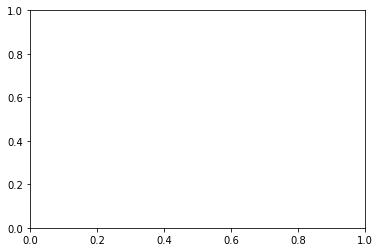

In [12]:
"""
plotly.express.pie(data_frame=None, names=None, values=None, color=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, color_discrete_sequence=None, color_discrete_map=None, hover_name=None, hover_data=None, custom_data=None, category_orders=None, labels=None, title=None, template=None, width=None, height=None, opacity=None, hole=None)
"""
ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

AttributeError: 'builtin_function_or_method' object has no attribute 'head'

In [15]:
fig = px.scatter(df, x = "Torque(Nm)", y="Price", color = "Make")
fig.show()